In [4]:
class VariableNode:
    def __init__(self, name, domain):
        self.name = name
        self.domain = domain
        self.neighbors = []
        self.messages = {}

    def add_neighbor(self, neighbor):
        self.neighbors.append(neighbor)

    def send_message(self, factor):
        incoming_messages = [
            self.messages.get(neighbor, 1)  # Default to 1 if no message yet
            for neighbor in self.neighbors
            if neighbor != factor
        ]
        product = 1
        for msg in incoming_messages:
            product *= msg
        print(f"Variable {self.name} sending message to Factor {factor.name}: {product}")
        factor.receive_message(self, product)

    def receive_message(self, neighbor, message):
        self.messages[neighbor] = message
        print(f"Variable {self.name} received message from Factor {neighbor.name}: {message}")


class FactorNode:
    def __init__(self, name, function, variables):
        self.name = name
        self.function = function
        self.variables = variables
        self.messages = {}

    def receive_message(self, variable, message):
        self.messages[variable] = message
        print(f"Factor {self.name} received message from Variable {variable.name}: {message}")

    def send_message(self, variable):
        incoming_messages = [
            self.messages.get(neighbor, 1)  # Default to 1 if no message yet
            for neighbor in self.variables
            if neighbor != variable
        ]
        product = 1
        for msg in incoming_messages:
            product *= msg
        marginal = self.function([variable]) * product
        print(f"Factor {self.name} sending message to Variable {variable.name}: {marginal}")
        variable.receive_message(self, marginal)


class FactorGraph:
    def __init__(self):
        self.variable_nodes = []
        self.factor_nodes = []

    def add_variable_node(self, variable_node):
        self.variable_nodes.append(variable_node)

    def add_factor_node(self, factor_node):
        self.factor_nodes.append(factor_node)

    def run_sum_product(self):
        print("\nStarting Sum-Product Algorithm:")
        for factor_node in self.factor_nodes:
            for variable in factor_node.variables:
                factor_node.send_message(variable)

        for variable_node in self.variable_nodes:
            for neighbor in variable_node.neighbors:
                variable_node.send_message(neighbor)

        print("\nFinal Marginals:")
        for variable_node in self.variable_nodes:
            final_belief = 1
            for message in variable_node.messages.values():
                final_belief *= message
            print(f"Marginal of Variable {variable_node.name}: {final_belief}")


# Example of using the factor graph and sum-product algorithm
def example_function(variables):
    # Placeholder function, replace with your factor logic
    return sum(var.domain[0] for var in variables)

# Define variable nodes
A = VariableNode("A", [0, 1])
B = VariableNode("B", [0, 1])
C = VariableNode("C", [0, 1])

# Define factor nodes
f1 = FactorNode("f1", example_function, [A, B])
f2 = FactorNode("f2", example_function, [B, C])

# Construct the factor graph
graph = FactorGraph()
graph.add_variable_node(A)
graph.add_variable_node(B)
graph.add_variable_node(C)
graph.add_factor_node(f1)
graph.add_factor_node(f2)

# Connect nodes in the graph
A.add_neighbor(f1)
B.add_neighbor(f1)
B.add_neighbor(f2)
C.add_neighbor(f2)

# Run sum-product algorithm
graph.run_sum_product()



Starting Sum-Product Algorithm:
Factor f1 sending message to Variable A: 0
Variable A received message from Factor f1: 0
Factor f1 sending message to Variable B: 0
Variable B received message from Factor f1: 0
Factor f2 sending message to Variable B: 0
Variable B received message from Factor f2: 0
Factor f2 sending message to Variable C: 0
Variable C received message from Factor f2: 0
Variable A sending message to Factor f1: 1
Factor f1 received message from Variable A: 1
Variable B sending message to Factor f1: 0
Factor f1 received message from Variable B: 0
Variable B sending message to Factor f2: 0
Factor f2 received message from Variable B: 0
Variable C sending message to Factor f2: 1
Factor f2 received message from Variable C: 1

Final Marginals:
Marginal of Variable A: 0
Marginal of Variable B: 0
Marginal of Variable C: 0


Question Graph:


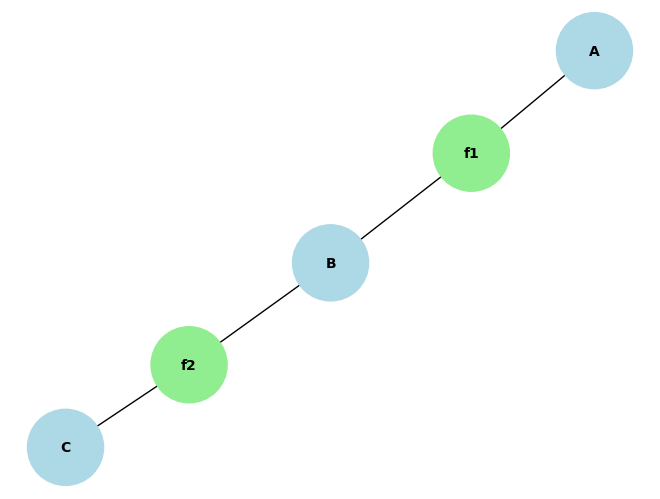


Final Marginals: {'A': 0, 'B': 0, 'C': 0}
Output Graph with Marginals:


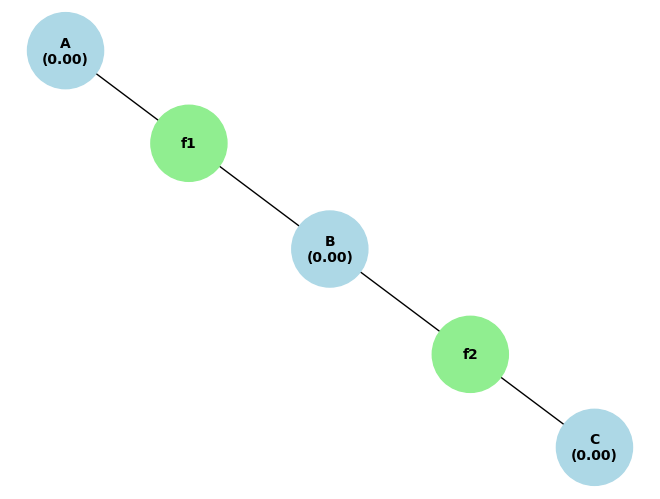

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

class VariableNode:
    def __init__(self, name, domain):
        self.name = name
        self.domain = domain
        self.neighbors = []
        self.messages = {}

    def add_neighbor(self, neighbor):
        self.neighbors.append(neighbor)

    def send_message(self, factor):
        incoming_messages = [
            self.messages.get(neighbor, 1)  # Default to 1 if no message yet
            for neighbor in self.neighbors
            if neighbor != factor
        ]
        product = 1
        for msg in incoming_messages:
            product *= msg
        factor.receive_message(self, product)

    def receive_message(self, neighbor, message):
        self.messages[neighbor] = message

    def marginal(self):
        final_belief = 1
        for message in self.messages.values():
            final_belief *= message
        return final_belief


class FactorNode:
    def __init__(self, name, function, variables):
        self.name = name
        self.function = function
        self.variables = variables
        self.messages = {}

    def receive_message(self, variable, message):
        self.messages[variable] = message

    def send_message(self, variable):
        incoming_messages = [
            self.messages.get(neighbor, 1)  # Default to 1 if no message yet
            for neighbor in self.variables
            if neighbor != variable
        ]
        product = 1
        for msg in incoming_messages:
            product *= msg
        marginal = self.function([variable]) * product
        variable.receive_message(self, marginal)


class FactorGraph:
    def __init__(self):
        self.variable_nodes = []
        self.factor_nodes = []

    def add_variable_node(self, variable_node):
        self.variable_nodes.append(variable_node)

    def add_factor_node(self, factor_node):
        self.factor_nodes.append(factor_node)

    def run_sum_product(self):
        for factor_node in self.factor_nodes:
            for variable in factor_node.variables:
                factor_node.send_message(variable)

        for variable_node in self.variable_nodes:
            for neighbor in variable_node.neighbors:
                variable_node.send_message(neighbor)

    def get_final_marginals(self):
        marginals = {}
        for variable_node in self.variable_nodes:
            marginals[variable_node.name] = variable_node.marginal()
        return marginals

    def plot_graph(self, marginals=None):
        G = nx.Graph()
        labels = {}

        # Add variable nodes and factor nodes
        for var_node in self.variable_nodes:
            G.add_node(var_node.name, color='lightblue')
            labels[var_node.name] = f"{var_node.name}\n({marginals[var_node.name]:.2f})" if marginals else var_node.name

        for factor_node in self.factor_nodes:
            G.add_node(factor_node.name, color='lightgreen')
            labels[factor_node.name] = factor_node.name

        # Add edges
        for var_node in self.variable_nodes:
            for neighbor in var_node.neighbors:
                G.add_edge(var_node.name, neighbor.name)

        # Plot the graph
        pos = nx.spring_layout(G)
        colors = [G.nodes[n]['color'] for n in G.nodes]
        nx.draw(G, pos, with_labels=True, labels=labels, node_color=colors, node_size=3000, font_size=10, font_color='black', font_weight='bold')
        plt.show()


# Example of using the factor graph and sum-product algorithm
def example_function(variables):
    # Placeholder function, replace with your factor logic
    return sum(var.domain[0] for var in variables)

# Define variable nodes
A = VariableNode("A", [0, 1])
B = VariableNode("B", [0, 1])
C = VariableNode("C", [0, 1])

# Define factor nodes
f1 = FactorNode("f1", example_function, [A, B])
f2 = FactorNode("f2", example_function, [B, C])

# Construct the factor graph
graph = FactorGraph()
graph.add_variable_node(A)
graph.add_variable_node(B)
graph.add_variable_node(C)
graph.add_factor_node(f1)
graph.add_factor_node(f2)

# Connect nodes in the graph
A.add_neighbor(f1)
B.add_neighbor(f1)
B.add_neighbor(f2)
C.add_neighbor(f2)

# Plot the question graph (before running the algorithm)
print("Question Graph:")
graph.plot_graph()

# Run sum-product algorithm
graph.run_sum_product()

# Get and print final marginals
final_marginals = graph.get_final_marginals()
print("\nFinal Marginals:", final_marginals)

# Plot the output graph (with marginals)
print("Output Graph with Marginals:")
graph.plot_graph(marginals=final_marginals)
